In [168]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 9)

In [169]:
# Create a simple indicator function that returns 1 if passed an odd argument,
# and 0 otherwise.

def indicator(card):
  if card % 2 == 1:
    return 1
  else:
    return 0

In [170]:
# Profit per unit bet, Y_n.

def profit(next_card):
  profit = (2 * indicator(next_card)) - 1
  return profit

In [171]:
# Conditional expected profit per unit bet, Z_n.
# Compute Z_n by passing a sliced array, representing cards seen.
# That is Z_n = (N, n, shuffled_deck[0:n])

def cndtnl_expctd_prft1(deck_size, no_dealt_cards, dealt_cards):
  conditional_expected_profit = ((1 / (deck_size - no_dealt_cards))
                                * np.sum((-1) ** dealt_cards))
  return conditional_expected_profit

In [172]:
# Conditional expected profit per unit bet.
# This computes Z_n using the number of odd cards, rather than a history of seen cards.

def cndtnl_expctd_prft2(deck_size, no_dealt_cards, no_odd_cards):
  conditional_expected_profit = ((2 / (deck_size - no_dealt_cards))
                                    * ((deck_size / 2)  - no_odd_cards) - 1)
  return conditional_expected_profit

In [173]:
# Simulate a shuffled deck.
# Deck-size must be even, in line with example.

deck_size = 4
deck = np.arange(deck_size) + 1
shuffled_deck = np.random.permutation(deck)

In [174]:
# Compute realisations of the conditional expected profit per unit bet.
# Verified against pen and paper calculations for N = 4.

def compute_realisations(deck_size, no_dealt_cards):
  realisations = []
  max_no_odd_cards = int(deck_size / 2)
  if no_dealt_cards < max_no_odd_cards:
    for i in range(no_dealt_cards + 1):
      realisations.append(cndtnl_expctd_prft2(deck_size, no_dealt_cards, i))
  else:
    for i in range(max_no_odd_cards + 1):
      realisations.append(cndtnl_expctd_prft2(deck_size, no_dealt_cards, i))
  realisations = np.array(realisations)
  return realisations

In [175]:
# Some info on using the hypergeometric distribution.
# Scipy parameter conventions:
# k = no. of successes.
# M = population size.
# n = number of draws.
# N = no. of success states in the population.

stats.hypergeom.pmf(k=0, M=4, n=2, N=2)

0.1666666666666667

In [176]:
# Compute probabilities for each realisastion/outcome of the conditional
# expected profit per unit bet random variable after n cards have been seen.
# Verified against pen and paper calculations for N = 4. 
# If difficulty with this - go back to the PMF table for dice!

def compute_probabilities(deck_size, no_dealt_cards):
  probabilities = []
  max_no_odd_cards = int(deck_size / 2)
  if no_dealt_cards < max_no_odd_cards:
    for i in range(no_dealt_cards + 1):
      probabilities.append(stats.hypergeom.pmf(i,
                                               M=deck_size,
                                               n=no_dealt_cards,
                                               N=no_odd_cards))
  else:
    for i in range(max_no_odd_cards + 1):
      probabilities.append(stats.hypergeom.pmf(i,
                                               M=deck_size,
                                               n=no_dealt_cards,
                                               N=no_odd_cards))
  probabilities = np.array(probabilities)
  return probabilities

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Probability')

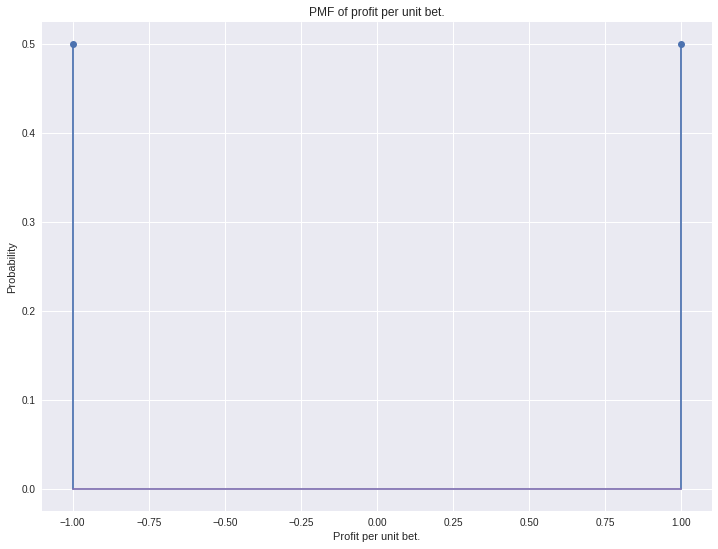

In [177]:
# Plot PMF of profit per unit bet, Y_n.
# Q: From this PMF, does the profit per unit bet have mean of 0?

profit_PMF = plt.stem([-1, 1], [0.5, 0.5])
plt.title("PMF of profit per unit bet.")
plt.xlabel("Profit per unit bet.")
plt.ylabel("Probability")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Probability.')

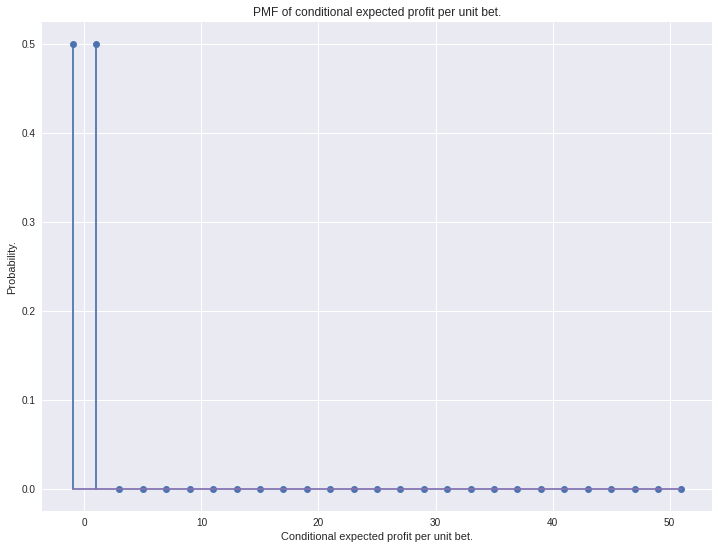

In [178]:
# Plot PMFs of the sequence of conditonal expeceted profit per unit bet rvs.
# That is Z_0, Z_1, Z_2,...,Z_51
# Explicitly show these PMFs plots next to the main results.
# The main results in question are the mean and variance of the conditonal
# expected profit per unit bet.
# Tie together with the idea of conditonal expected profit per unit bet rv
# oscillating back and forth in the direction of the House and Player.

deck_size = 52
no_dealt_cards = 51
no_odd_cards = int(deck_size / 2)

realisations = compute_realisations(deck_size, no_dealt_cards)
probabilities = compute_probabilities(deck_size, no_dealt_cards)
plt.stem(realisations, probabilities)
plt.title("PMF of conditional expected profit per unit bet.")
plt.xlabel("Conditional expected profit per unit bet.")
plt.ylabel("Probability.")

In [179]:
# Analogy - sample space and PMF table for die rolling.
realisations

array([51., 49., 47., 45., 43., 41., 39., 37., 35., 33., 31., 29., 27.,
       25., 23., 21., 19., 17., 15., 13., 11.,  9.,  7.,  5.,  3.,  1.,
       -1.])

In [180]:
# Analogy - sample space and PMF table for die rolling.
probabilities

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5,
       0.5])

In [181]:
np.sum(probabilities[0:38])

1.0000000000000013

In [182]:
np.sum(probabilities[38::])

0.0

In [183]:
len(probabilities)

27

In [184]:
# Mean of the conditional expected profit per unit bet.
# According to our derivations this should be 0, for 0 <= n <= N-1

mean = np.sum(realisations * probabilities)
print(mean)

0.0


In [185]:
# Variance of the conditional expected profit per unit bet.
# Uses the realisations and probabilities we have computed.

second_moment = np.sum((realisations ** 2) * probabilities)
variance = second_moment - (mean ** 2)
print(variance)

1.0000000000000013


In [186]:
# Variance of the conditional expected profit per unit bet.
# Uses the formula we derived on slide 53.

derived_variance = (no_dealt_cards / ((deck_size - no_dealt_cards)
                                       * (deck_size - 1)))
print(derived_variance)

1.0


Text(0.5, 1.0, 'Probability mass function for no. odd cards seen.')

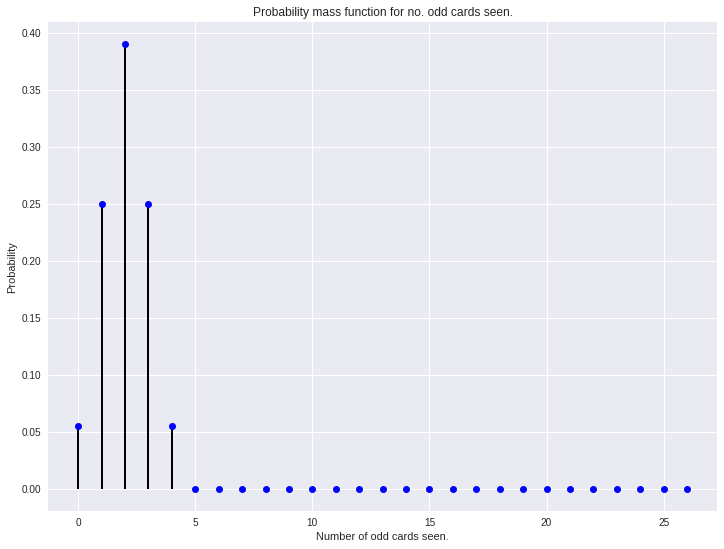

In [187]:
# Plots of the hypergeometric function.

[M, n, N] = [52, 26, 4]
rv = stats.hypergeom(M, n, N)
k = np.arange(0, n+1)
pmf_odd_cards = rv.pmf(k)

pmf = plt.figure()
ax = pmf.add_subplot(111)
ax.plot(k, pmf_odd_cards, 'bo')
ax.vlines(k, 0, pmf_odd_cards, lw=2)
ax.set_xlabel('Number of odd cards seen.')
ax.set_ylabel('Probability')
ax.set_title('Probability mass function for no. odd cards seen.')

In [188]:
# Hypergeometric function CDF computation, Normal approximation.

N = 52
K = 26
n = 24
beta = 0.0125

exact_p = stats.hypergeom.cdf(11, N, K, n)
z = (2/(N-n)) * (np.floor(beta * ((N-n) / 2)) + 0.5) * np.sqrt(((N-n) * (N-1))/n)
norm_approx = 1 - stats.norm.cdf(z)

print("The exact probability computed by the hypergeometric function is {}".format(exact_p))
print("Normal approximation to this probability is {}".format(norm_approx))

The exact probability computed by the hypergeometric function is 0.3906256397147484
Normal approximation to this probability is 0.39147121638853555


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


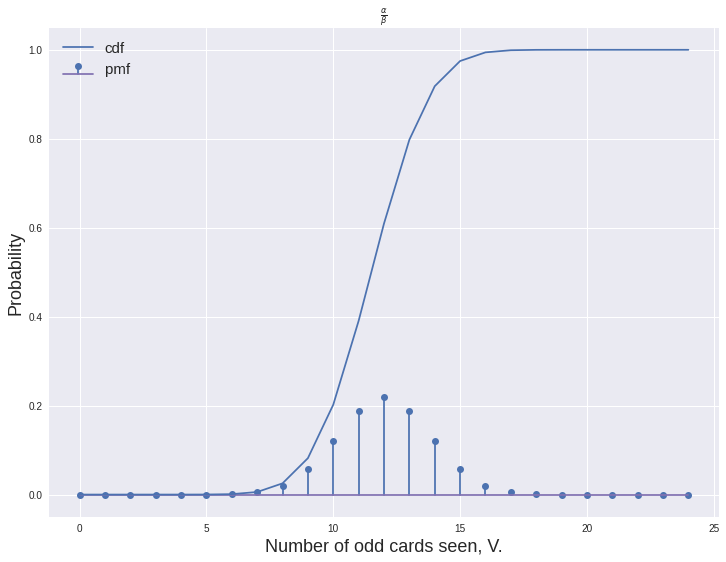

In [189]:
# Plots of the hypergeometric PMF, CDF

k = np.arange(0, n+1)
x = np.linspace(0, 1, 20)
PMF = stats.hypergeom.pmf(k, N, K, n)
CDF = stats.hypergeom.cdf(k, N, K, n)
plt.stem(k, PMF, label='pmf')
plt.plot(k, CDF, label='cdf')

#plt.title("PMF and CDF of the number of odd cards seen, V ~ Hyp(52, 26, 24)", fontsize=20)#
plt.title(r'$\frac{\alpha}{\beta}$')
plt.xlabel("Number of odd cards seen, V.", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.legend(loc=2, prop={'size': 15});
plt.show()

In [190]:
# Want to check correlation calculation in Ethier (2010).
# 100 * EOR(i) and HI-LO index for i = 1,...,10.

EOR_100 = np.array([-0.595250,
                0.382530,
                0.436234,
                0.553671,
                0.702373,
                0.414736,
                0.284252,
                0.002350,
                -0.168973,
                -0.502981])

EOR = EOR_100 / 100

HI_LO = np.array([-1,
                  1,
                  1,
                  1,
                  1,
                  1,
                  0,
                  0,
                  0,
                  -1])

# Weighted sum of EORs is equal to 0:

np.sum(EOR_100[0:9]) + (4 * EOR_100[9])

-9.999999996956888e-07

In [191]:
# Compute the mean, variance, and standard deviation of the scaled effects of removal,
# the HI-LO point count, and the correlation coefficient between them.

weights = np.array(([4/52] * 9) + [16/52])
E_i = 51 * EOR

est_gamma = np.dot(weights * E_i, HI_LO) / np.sum((weights * (HI_LO ** 2)))
print(est_gamma)

mu_J = np.sum(weights * HI_LO)
var_J = np.sum(weights * (HI_LO ** 2)) - (mu_J ** 2)
sd_J = np.sqrt(var_J)

mu_E = np.sum(weights * E_i)
var_E = np.sum(weights * (E_i ** 2)) - (mu_E ** 2)
sd_E = np.sqrt(var_E)

correlation = np.sum(np.dot(weights * E_i, HI_LO)) / (sd_E * sd_J)
print(correlation)

0.259932618
0.9659263809379192


In [192]:
# Compute mean, variance, standard deviation and correlation using sample versions
# To reinforce that the population and sample are the same in this instance,
# in the sense of the statistics are being used descriptively rather than
# inferentially.

E = []
for i in range(9):
  E = E + ([E_i[i]] * 4)
E_no_tens = np.array(E)

J = []
for i in range(9):
  J = J + ([HI_LO[i]] * 4)
J_no_tens = np.array(J)

E_tens = np.array(E_i[9])
J_tens = np.array(HI_LO[9])

E_sample = np.hstack((E_no_tens, E_tens * np.ones(16)))
J_sample = np.hstack((J_no_tens, J_tens * np.ones(16)))

sample_mu_J = np.mean(J_sample)
sample_mu_E = np.mean(E_sample)

E_norm = E_sample - sample_mu_E
J_norm = J_sample - sample_mu_J

gamma_sample = np.sum(E_norm * J_norm) / np.sum(J_norm ** 2)

sample_var_J = ((np.sum(J_norm** 2))/ 52)
sample_std_J = np.sqrt(sample_var_J)

sample_var_E = ((np.sum(E_norm ** 2))/ 52)
sample_std_E = np.sqrt(sample_var_E)

sample_correlation = np.sum(E_norm * J_norm) / ((np.sqrt(np.sum(E_norm ** 2))) * (np.sqrt(np.sum(J_norm ** 2))))
r = ((1 /  52) * np.sum(E_norm * J_norm)) / (sample_std_J * sample_std_E)
print(sample_correlation)
print(r)

0.965926380937919
0.9659263809379193


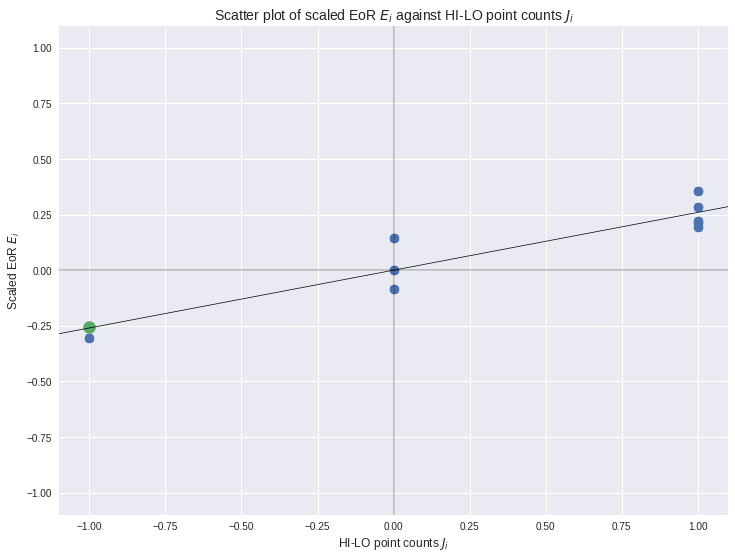

In [193]:
# Scatter plot of E_i againts J_i.

x = np.linspace(-1.5, 1.5, 100)
y = est_gamma * x
plt.plot(x, y, color='k', lw=0.7)

plt.scatter(J_no_tens, E_no_tens, s=80,alpha=1)
plt.scatter(J_tens, E_tens, s=150)

plt.axvline(0, -1.1, 1.1, color='k', lw=0.4)
plt.axhline(0, -1.1, 1.1, color='k', lw=0.4)

plt.title('Scatter plot of scaled EoR ' + r'$E_i$' +  ' against HI-LO point counts ' + r'$J_i$', fontsize=14)
plt.xlabel("HI-LO point counts " + r'$J_i$', fontsize=12)
plt.ylabel('Scaled EoR ' + r'$E_i$', fontsize=12)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

plt.show()

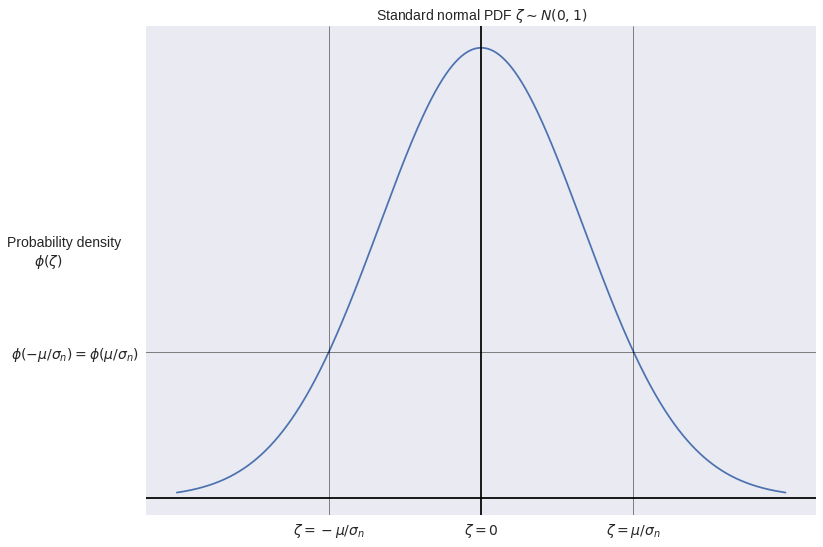

In [194]:
# PDF plot of standard normal to show symmetry.

mu = 0
sigma = 1
zeta = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(zeta, stats.norm.pdf(zeta, mu, sigma))

plt.axvline(0, 0, 1, color='k')
plt.axhline(0, mu - 10*sigma , mu + 10*sigma, color='k')
plt.axvline(-1.5, 0, 1, linewidth=0.5, color='k')
plt.axvline(1.5, 0, 1, linewidth=0.5, color='k')
plt.axhline(stats.norm.pdf(-1.5, mu, sigma), mu - 4*sigma, mu + 4*sigma,
           lw=0.5, color='k')

plt.title('Standard normal PDF' + ' ' +r'$\zeta \sim N(0,1)$', fontsize=14)

plt.xticks([-1.5, 0, 1.5],
           labels=[r'$\zeta = - \mu / \sigma_n$',
                   r'$\zeta = 0$',
                   r'$\zeta = \mu / \sigma_n$'], fontsize=14)
plt.yticks(ticks=[stats.norm.pdf(-1.5, mu, sigma), ],
           labels=[r'$\phi(-\mu / \sigma_n) = \phi(\mu / \sigma_n)$'],
           fontsize=14)

plt.ylabel('Probability density\n$\quad \quad \phi(\zeta)$',
           rotation='horizontal', ha='left', fontsize=14)

plt.show()

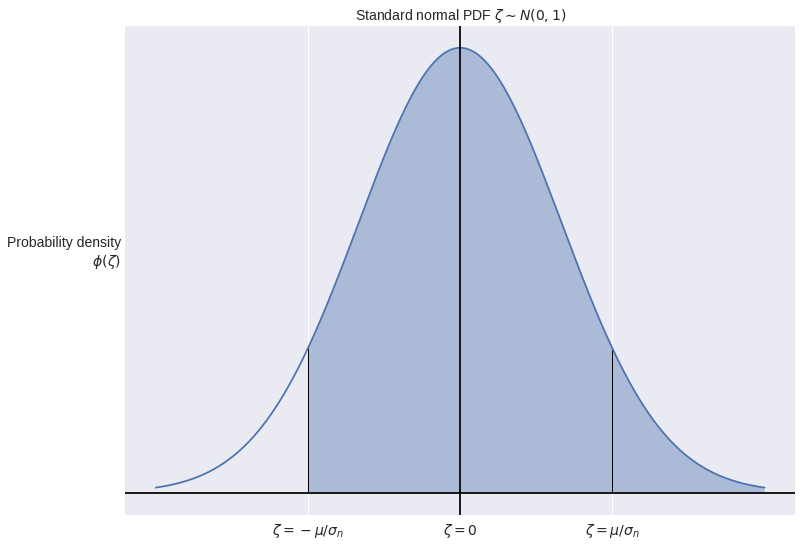

In [195]:
# PDF plot of  to show symmetry.

mu = 0
sigma = 1
zeta = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(zeta, stats.norm.pdf(zeta, mu, sigma))

plt.axvline(0, 0, 1, color='k')
plt.axhline(0, mu - 3*sigma , mu + 3*sigma, color='k')
plt.vlines(-1.5, 0, stats.norm.pdf(-1.5, mu, sigma) , linewidth=1, color='k')
plt.vlines(1.5, 0, stats.norm.pdf(1.5, mu, sigma) , linewidth=1, color='k')
plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > -1.5), alpha=0.4)

plt.title('Standard normal PDF' + ' ' +r'$\zeta \sim N(0,1)$', fontsize=14)
plt.xticks([-1.5, 0, 1.5], (r'$\zeta = - \mu / \sigma_n$', r'$\zeta = 0$', r'$\zeta = \mu / \sigma_n$'), fontsize=14)
plt.yticks([])
plt.ylabel('Probability density\n$\quad \phi(\zeta)$',
           rotation='horizontal', ha='right', fontsize=14)

plt.show()

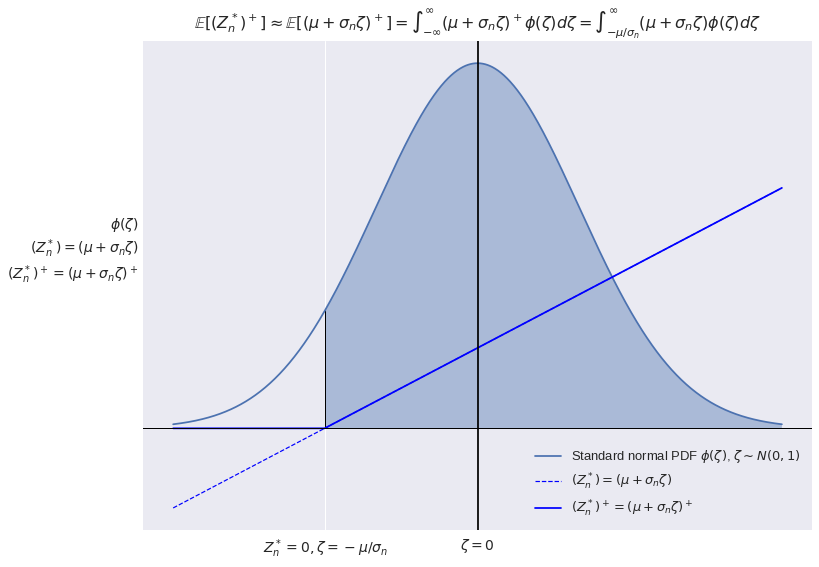

In [196]:
# Illustration to show expectation of positive part of player advantage assuming
# card-counter exploiting superfair betting opportunities.
# Not to scale - numbers are arbitrarily defined, like the previous PDF plots.

mu = 0
sigma = 1
zeta = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(zeta, stats.norm.pdf(zeta, mu, sigma))

z = mu_0 + (asd * (zeta + 1.5))
plt.plot(zeta, z, color='b', linestyle='dashed', lw=1.2)

z_positive = np.maximum(mu_0 + (asd * (zeta + 1.5)), 0)
plt.plot(zeta, z_positive, color='b')

plt.axvline(0, 0, 1, color='k')
plt.axhline(0, mu - 3*sigma , mu + 3*sigma, color='k', linewidth=1)
plt.vlines(-1.5, 0, stats.norm.pdf(-1.5, mu, sigma) , linewidth=1, color='k')

plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > -1.5), alpha=0.4)

plt.title(r'$\mathbb{E}[{({Z}^*_n)}^+] \approx \mathbb{E}[{(\mu + \sigma_n \zeta)}^+]$'
+ r'$= \int^\infty_{-\infty} {(\mu + \sigma_n \zeta)}^+ \phi(\zeta) d\zeta $'
+ r'$= \int^\infty_{-\mu / \sigma_n} {(\mu + \sigma_n \zeta)} \phi(\zeta) d\zeta $', fontsize=16)
plt.xticks([-1.5, 0], (r'${Z}^*_n = 0, \zeta = - \mu / \sigma_n$', r'$\zeta = 0$'), fontsize=14)
plt.yticks([])
plt.ylabel(r'$\phi(\zeta)$' + '\n' 
           + r'${({Z}^*_n)} = (\mu + \sigma_n \zeta)$' + '\n'
           + r'${({Z}^*_n)}^+ = (\mu + \sigma_n \zeta)^+$',
           rotation='horizontal', ha='right', fontsize=14)
plt.legend(['Standard normal PDF ' + r'$\phi(\zeta)$' + ', ' + 
            r'$\zeta \sim N(0,1)$',
            r'${({Z}^*_n)} = (\mu + \sigma_n \zeta)$',
            r'${({Z}^*_n)}^+ = (\mu + \sigma_n \zeta)^+$'], fontsize=13)

plt.show()

In [197]:
# Computes probabilities as in Table 21.10 of Ethier (2010).
# Uses the fixed constants as described in the slides.

def complementary_CDF(n, beta):
  N = 52
  mu_0 = 0.000412515770
  est_gamma = 0.259932
  sigma_j = np.sqrt(10/13)

  t = (np.floor((N - n) * ((beta - mu_0)/(est_gamma))) + 0.5) * ((1 / sigma_j)*(np.sqrt(51/((n)*(52-n)))))

  probability = 1 - stats.norm.cdf(t)
  
  return probability

In [198]:
# Function that computes the asymptotic standard deviation of the approximate
# conditional expected profit per unit bet under the HI_LO system.

def asymptotic_sd(gamma, n, N, var_J):
  asymptotic_sd = np.sqrt(((gamma ** 2) * (var_J) * n)/((N-n) * (N-1)))
  return asymptotic_sd

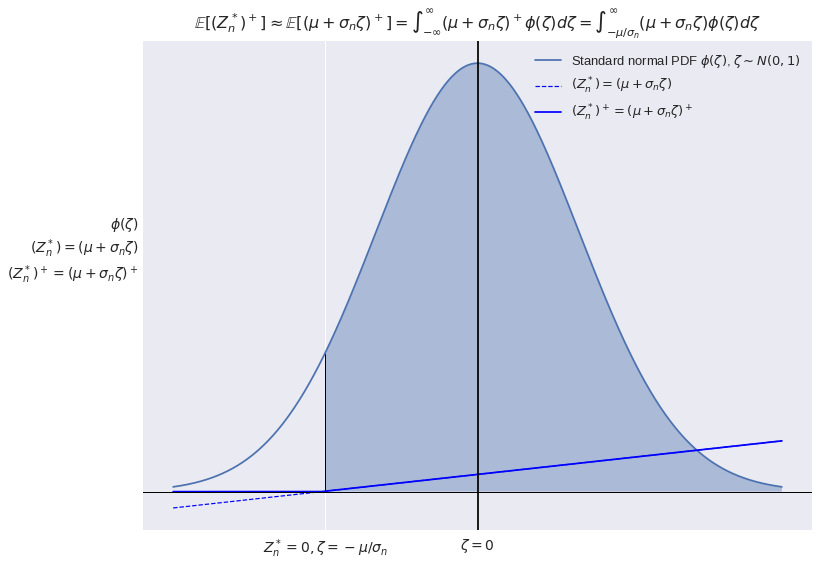

In [199]:
# Illustration to show expectation of positive part of player advantage assuming
# card-counter exploiting superfair betting opportunities.
# Not to scale - numbers are arbitrarily defined, like the previous PDF plots.

mu = 0
sigma = 1
zeta = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(zeta, stats.norm.pdf(zeta, mu, sigma))

mu_0 = 0.000412515770
N = 52

asd = asymptotic_sd(est_gamma, 5, N, var_J)

z = mu_0 + (asd * (zeta + 1.5))
plt.plot(zeta, z, color='b', linestyle='dashed', lw=1.2)

z_positive = np.maximum(mu_0 + (asd * (zeta + 1.5)), 0)
plt.plot(zeta, z_positive, color='b')

plt.axvline(0, 0, 1, color='k')
plt.axhline(0, mu - 3*sigma , mu + 3*sigma, color='k', linewidth=1)
plt.vlines(-1.5, 0, stats.norm.pdf(-1.5, mu, sigma) , linewidth=1, color='k')

plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > -1.5), alpha=0.4)

plt.title(r'$\mathbb{E}[{({Z}^*_n)}^+] \approx \mathbb{E}[{(\mu + \sigma_n \zeta)}^+]$'
+ r'$= \int^\infty_{-\infty} {(\mu + \sigma_n \zeta)}^+ \phi(\zeta) d\zeta $'
+ r'$= \int^\infty_{-\mu / \sigma_n} {(\mu + \sigma_n \zeta)} \phi(\zeta) d\zeta $', fontsize=16)
plt.xticks([-1.5, 0], (r'${Z}^*_n = 0, \zeta = - \mu / \sigma_n$', r'$\zeta = 0$'), fontsize=14)
plt.yticks([])
plt.ylabel(r'$\phi(\zeta)$' + '\n' 
           + r'${({Z}^*_n)} = (\mu + \sigma_n \zeta)$' + '\n'
           + r'${({Z}^*_n)}^+ = (\mu + \sigma_n \zeta)^+$',
           rotation='horizontal', ha='right', fontsize=14)
plt.legend(['Standard normal PDF ' + r'$\phi(\zeta)$' + ', ' + 
            r'$\zeta \sim N(0,1)$',
            r'${({Z}^*_n)} = (\mu + \sigma_n \zeta)$',
            r'${({Z}^*_n)}^+ = (\mu + \sigma_n \zeta)^+$'], fontsize=13)

plt.show()

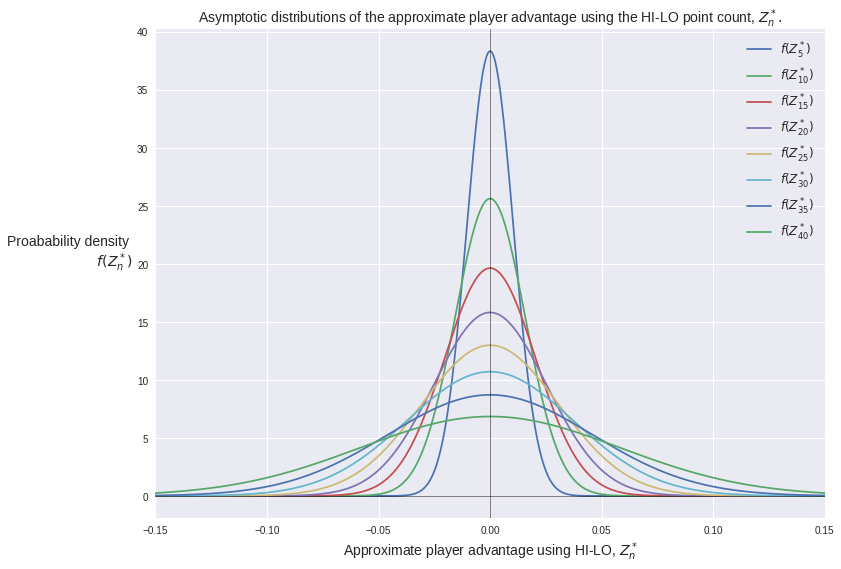

In [200]:
# Plots of the PDF of the approximate conditional expected profit per unit bet
# under the HI-LO system , Z*_n, for the following number of cards seen:
# n = 5, 10, 15, 20, 25, 30, 35, 40.

# Check and tidy this up, available for GitHub viewing.

mu_0 = 0.000412515770
N = 52

max_sd = asymptotic_sd(est_gamma, 40, N, var_J)

x = np.linspace(mu - (3 * max_sd), mu + (3 * max_sd), 1000)

for n in range(5, 45, 5):
  sd_n = asymptotic_sd(est_gamma, n, N, var_J)

  plt.plot(x, stats.norm.pdf(x, mu, sd_n))

plt.xlim(-0.15, 0.15)
plt.axvline(0, 0, 1, color='k', lw=0.5)
plt.axhline(0, 0, 1, color='k', lw=0.5)
plt.legend([r'$f({Z}^*_5)$',
            r'$f({Z}^*_{10})$',
            r'$f({Z}^*_{15})$',
            r'$f({Z}^*_{20})$',
            r'$f({Z}^*_{25})$',
            r'$f({Z}^*_{30})$',
            r'$f({Z}^*_{35})$',
            r'$f({Z}^*_{40})$'],
            fontsize=12)
plt.title('Asymptotic distributions of the approximate player advantage ' + 
           'using the HI-LO point count, ' + r'${Z}^*_n.$', fontsize=14)
plt.xlabel('Approximate player advantage using HI-LO, ' + 
           r'${Z}^*_n$', fontsize=14)
plt.ylabel('Proabability density \n $f({Z}^*_n)$',
           rotation='horizontal', ha='right', fontsize=14)
plt.show()

In [201]:
# Compute continuity corrected advantage threshold.
# This is used with the complementary CDF in Table 21.10 of Ethier (2010).

def compute_threshold_cont_corr(N, n, beta, mu, gamma, sd_J):
  threshold = ((np.floor((N - n) * ((beta - mu)/(gamma))) + 0.5)
       * ((1 / sd_J)*(np.sqrt(51/((n)*(52-n))))))
  return threshold

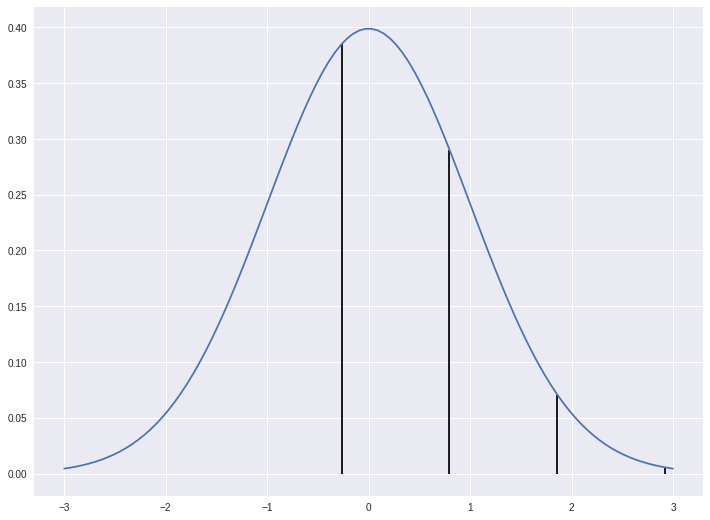

In [ ]:
# Show the CDF computations on a standard N(0,1) PDF.

stdrd_norm_mu = 0
stdrd_norm_sigma = 1
N = 52

z = np.linspace(stdrd_norm_mu - (3 * stdrd_norm_sigma),
                stdrd_norm_mu + (3 * stdrd_norm_sigma), 100)

for beta in [0.000, 0.010, 0.020, 0.030]:
  threshold = compute_threshold_cont_corr(N, 5, beta, mu_0, est_gamma, sd_J)
  plt.vlines(threshold, 0, stats.norm.pdf(threshold, 0, 1), color='k')

plt.plot(z, stats.norm.pdf(z, 0, 1))

In [203]:
# Slides 
# Function to plot PDFs of standard Normal.
# Only works up to n = 30 before ticks overlap.

def plt_PDFs(n):
  stdrd_norm_mu = 0
  stdrd_norm_sigma = 1
  N = 52

  zeta = np.linspace(stdrd_norm_mu - (3 * stdrd_norm_sigma),
                stdrd_norm_mu + (3 * stdrd_norm_sigma), 1000)
  
  plt.plot(zeta, stats.norm.pdf(zeta, 0, 1))
  
  asd = asymptotic_sd(est_gamma, n, N, var_J)
  approx_z_n = mu_0 + (asd * zeta)
  approx_z_n_plus = np.maximum(mu_0 + (asd * zeta), 0)

  #plt.plot(zeta, approx_z_n, color='b', linestyle='dashed', lw=1.2)
  plt.plot(zeta, approx_z_n_plus, color='b', lw=1.5)

  thresholds = []

  for beta in [0.000, 0.010, 0.020, 0.030]:
    threshold = compute_threshold_cont_corr(N, n, beta, mu_0, est_gamma, sd_J)
    thresholds.append(threshold)
    plt.vlines(threshold, 0, stats.norm.pdf(threshold, 0, 1), color='k', lw=1.2)
    threshold2 = ((beta - mu_0) / asymptotic_sd(est_gamma, n , N, var_J))
    plt.vlines(threshold2, 0, stats.norm.pdf(threshold2, 0, 1),
              linestyles='dashed', lw=0.7, color='k')
  plt.axhline(0, 0, 1, lw=0.5, color='k')
  plt.axvline(0, 0, 1, lw=0.5, color='k')

  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[0]), color='#1f77b4', alpha=0.2)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[1]), color='#1f77b4', alpha=0.4)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[2]), color='#1f77b4', alpha=0.6)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[3]), color='#1f77b4', alpha=0.8)

  plt.xticks(thresholds, (r'$0$', r'$0.01$', r'$0.02$',
                        r'$0.03$'), fontsize=12)  
  plt.xlim(-3, 3)

  plt.title(r'$P({Z}^*_n > \beta)$ ' + 'and ' + r'$\mathbb{E}[{({Z}^*_n)}^+]$'
            + ' when n = {} cards have been seen.'.format(n) + '\n'
            + 'Standard normal PDF ' + r'$\zeta \sim N(0,1)$.'
            , fontsize=15)
  plt.xlabel('$\zeta$ ' + '\n'
             + 'Above axis is labelled with values of advantage threshold, '
             + r'$\beta$' 
             + ' which are used to compute values of the arguments to '
             + r'$\Phi(\zeta)$.'
             , fontsize=14)
  plt.ylabel("Probability density " + r'$\phi(\zeta)$,' + '\n'
             #+ r'${Z}^*_n = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)$' + '\n'#
             r'${({Z}^*_n)}^+ = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)^+$,' + '\n',
             rotation='horizontal', ha='right', fontsize=14)

  plt.legend(['Standard normal PDF $\phi(\zeta)$',
              #r'${Z}^*_n = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)$',#
              r'${({Z}^*_n)}^+ = (\mu(\mathbf{0}) + \widehat{\sigma}^2(n))^+$'], fontsize=14)

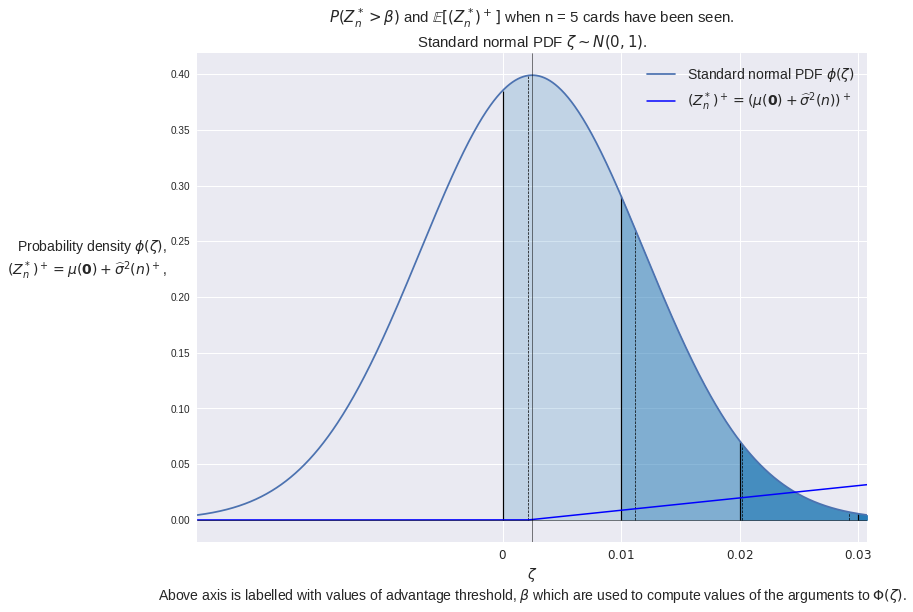

In [204]:
plt_PDFs(5)

In [205]:
# Use this for plotting PDF for n = 35, to deal with overlapping x-ticks issue.

def plt_PDFs_2(n):
  stdrd_norm_mu = 0
  stdrd_norm_sigma = 1
  N = 52

  zeta = np.linspace(stdrd_norm_mu - (3 * stdrd_norm_sigma),
                stdrd_norm_mu + (3 * stdrd_norm_sigma), 1000)
  
  plt.plot(zeta, stats.norm.pdf(zeta, 0, 1))
  
  asd = asymptotic_sd(est_gamma, n, N, var_J)
  approx_z_n = mu_0 + (asd * zeta)
  approx_z_n_plus = np.maximum(mu_0 + (asd * zeta), 0)

  #plt.plot(zeta, approx_z_n, color='b', linestyle='dashed', lw=1.2)
  plt.plot(zeta, approx_z_n_plus, color='b', lw=1.5)

  thresholds = []

  for beta in [0.000, 0.010, 0.020, 0.030]:
    threshold = compute_threshold_cont_corr(N, n, beta, mu_0, est_gamma, sd_J)
    thresholds.append(threshold)
    plt.vlines(threshold, 0, stats.norm.pdf(threshold, 0, 1), color='k', lw=1.2)
    threshold2 = ((beta - mu_0) / asymptotic_sd(est_gamma, n , N, var_J))
    plt.vlines(threshold2, 0, stats.norm.pdf(threshold2, 0, 1),
              linestyles='dashed', lw=0.7, color='k')
  plt.axhline(0, 0, 1, lw=0.5, color='k')
  plt.axvline(0, 0, 1, lw=0.5, color='k')

  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[0]), color='#1f77b4', alpha=0.2)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[1]), color='#1f77b4', alpha=0.4)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[2]), color='#1f77b4', alpha=0.6)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[3]), color='#1f77b4', alpha=0.8)

  plt.xticks(thresholds, (r'$0$', r'$0.01$', r'$0.02, 0.03$'),
             rotation=30, fontsize=12)  
  plt.xlim(-3, 3)

  plt.title(r'$P({Z}^*_n > \beta)$ ' + 'and ' + r'$\mathbb{E}[{({Z}^*_n)}^+]$'
            + ' when n = {} cards have been seen.'.format(n) + '\n'
            + 'Standard normal PDF ' + r'$\zeta \sim N(0,1)$.'
            , fontsize=15)
  plt.xlabel('$\zeta$ ' + '\n'
             + 'Above axis is labelled with values of advantage threshold, '
             + r'$\beta$' 
             + ' which are used to compute values of the arguments to '
             + r'$\Phi(\zeta)$.'
             , fontsize=14)
  plt.ylabel("Probability density " + r'$\phi(\zeta)$,' + '\n'
             #+ r'${Z}^*_n = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)$' + '\n'#
             r'${({Z}^*_n)}^+ = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)^+$,' + '\n',
             rotation='horizontal', ha='right', fontsize=14)

  plt.legend(['Standard normal PDF $\phi(\zeta)$',
              #r'${Z}^*_n = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)$',#
              r'${({Z}^*_n)}^+ = (\mu(\mathbf{0}) + \widehat{\sigma}^2(n))^+$'], fontsize=14)

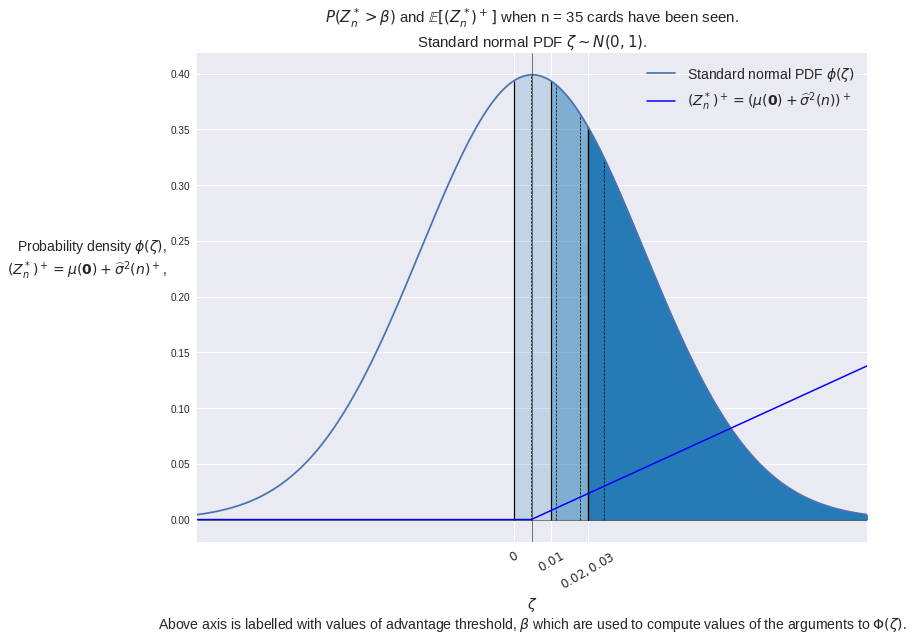

In [206]:
plt_PDFs_2(35)

In [207]:
# Use this for plotting PDF for n = 40, to deal with overlapping x-ticks issue.

def plt_PDFs_3(n):
  stdrd_norm_mu = 0
  stdrd_norm_sigma = 1
  N = 52

  zeta = np.linspace(stdrd_norm_mu - (3 * stdrd_norm_sigma),
                stdrd_norm_mu + (3 * stdrd_norm_sigma), 1000)
  
  plt.plot(zeta, stats.norm.pdf(zeta, 0, 1))
  
  asd = asymptotic_sd(est_gamma, n, N, var_J)
  approx_z_n = mu_0 + (asd * zeta)
  approx_z_n_plus = np.maximum(mu_0 + (asd * zeta), 0)

  #plt.plot(zeta, approx_z_n, color='b', linestyle='dashed', lw=1.2)
  plt.plot(zeta, approx_z_n_plus, color='b', lw=1.5)

  thresholds = []

  for beta in [0.000, 0.010, 0.020, 0.030]:
    threshold = compute_threshold_cont_corr(N, n, beta, mu_0, est_gamma, sd_J)
    thresholds.append(threshold)
    plt.vlines(threshold, 0, stats.norm.pdf(threshold, 0, 1), color='k', lw=1.2)
    threshold2 = ((beta - mu_0) / asymptotic_sd(est_gamma, n , N, var_J))
    plt.vlines(threshold2, 0, stats.norm.pdf(threshold2, 0, 1),
              linestyles='dashed', lw=0.7, color='k')
  plt.axhline(0, 0, 1, lw=0.5, color='k')
  plt.axvline(0, 0, 1, lw=0.5, color='k')

  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[0]), color='#1f77b4', alpha=0.2)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[1]), color='#1f77b4', alpha=0.4)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[2]), color='#1f77b4', alpha=0.6)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[3]), color='#1f77b4', alpha=0.8)

  plt.xticks(thresholds, (r'$0$', r'$0.01, 0.02$', ' ', r'$0.03$'),
             rotation=30, fontsize=12)  
  plt.xlim(-3, 3)

  plt.title(r'$P({Z}^*_n > \beta)$ ' + 'and ' + r'$\mathbb{E}[{({Z}^*_n)}^+]$'
            + ' when n = {} cards have been seen.'.format(n) + '\n'
            + 'Standard normal PDF ' + r'$\zeta \sim N(0,1)$.'
            , fontsize=15)
  plt.xlabel('$\zeta$ ' + '\n'
             + 'Above axis is labelled with values of advantage threshold, '
             + r'$\beta$' 
             + ' which are used to compute values of the arguments to '
             + r'$\Phi(\zeta)$.'
             , fontsize=14)
  plt.ylabel("Probability density " + r'$\phi(\zeta)$,' + '\n'
             #+ r'${Z}^*_n = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)$' + '\n'#
             r'${({Z}^*_n)}^+ = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)^+$,' + '\n',
             rotation='horizontal', ha='right', fontsize=14)

  plt.legend(['Standard normal PDF $\phi(\zeta)$',
              #r'${Z}^*_n = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)$',#
              r'${({Z}^*_n)}^+ = (\mu(\mathbf{0}) + \widehat{\sigma}^2(n))^+$'], fontsize=14)

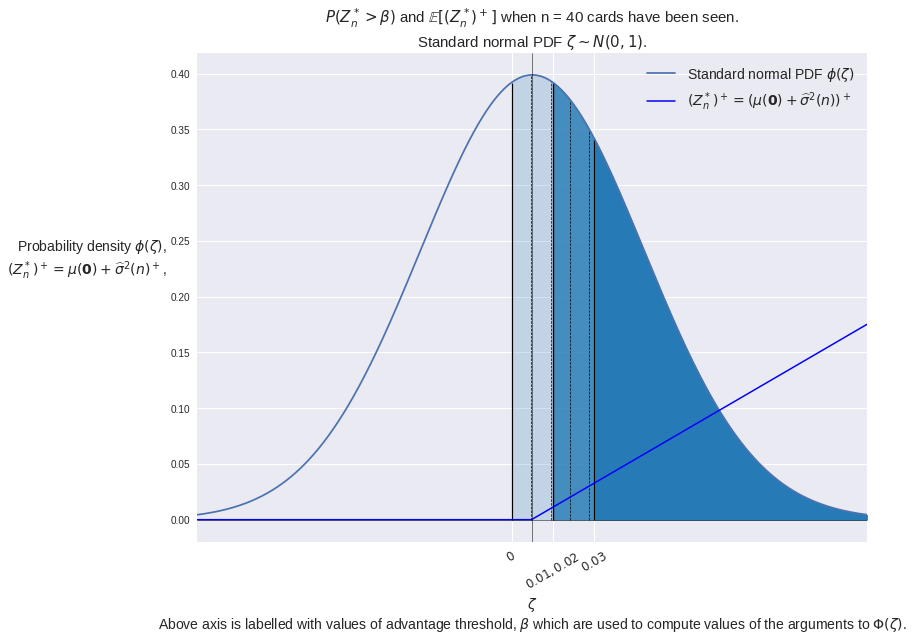

In [208]:
plt_PDFs_3(40)

In [209]:
# Computing probability of advantage exceeding threshold without using continuity correction.
# Computed independently on Wolfram Mathematica and it matches to 15 decimal places.

1 - stats.norm.cdf(((0.00 - mu_0) / asymptotic_sd(est_gamma, 5 , N, var_J)),0, 1)

0.5158014495527251

['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

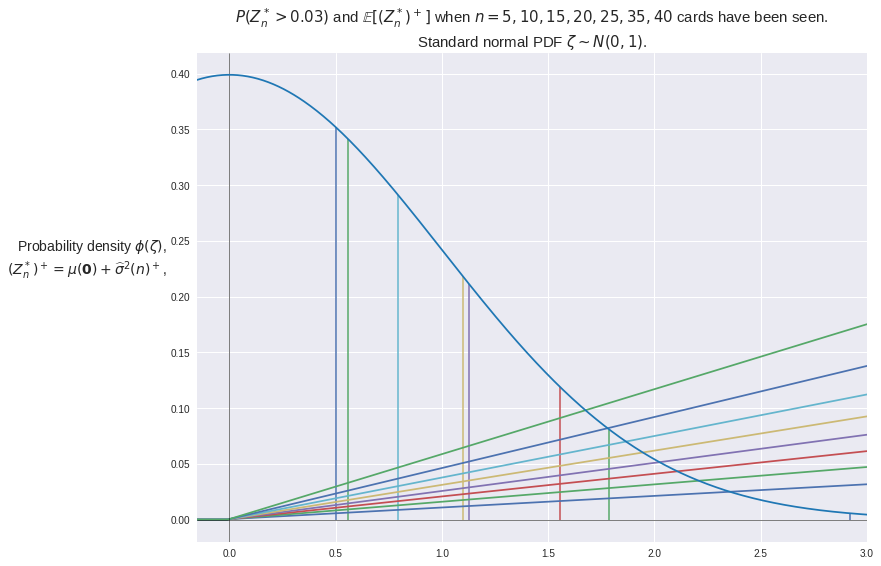

In [210]:
# Visualisation of key results.

stdrd_norm_mu = 0
stdrd_norm_sigma = 1
N = 52

# Save automated colour cycle pyplot uses to establish correspondence
# between thresholds and approx conditional exp profit per unit bet.

colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
colours = colours + [colours[0]] + [colours[1]]

for n, colour in zip([5, 10, 15, 20, 25, 30, 35, 40], colours):
  asd = asymptotic_sd(est_gamma, n, N, var_J)
  z = np.linspace(stdrd_norm_mu - (3 * stdrd_norm_sigma),
                stdrd_norm_mu + (3 * stdrd_norm_sigma), 1000)
  y = np.maximum(mu_0 + (asd * z), 0)
  for beta in [0.030]:
    threshold = compute_threshold_cont_corr(N, n, beta, mu_0, est_gamma, sd_J)
    plt.vlines(threshold, 0, stats.norm.pdf(threshold, 0, 1), color=colour, lw=1.5)

  plt.plot(z, y)  

plt.axhline(0, 0, 1, lw=0.5, color='k')
plt.axvline(0, 0, 1, lw=0.5, color='k')

plt.title(r'$P({Z}^*_n > 0.03)$ ' + 'and ' + r'$\mathbb{E}[{({Z}^*_n)}^+]$'
            + ' when $n = 5, 10, 15, 20, 25, 35, 40$ cards have been seen.' + '\n'
            + 'Standard normal PDF ' + r'$\zeta \sim N(0,1)$.'
            , fontsize=15)
plt.xlim(-0.15, 3)
plt.ylabel("Probability density " + r'$\phi(\zeta)$,' + '\n'
           #+ r'${Z}^*_n = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)$' + '\n'#
           r'${({Z}^*_n)}^+ = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)^+$,' + '\n',
           rotation='horizontal', ha='right', fontsize=14)
plt.xticks()

plt.plot(z, stats.norm.pdf(z, 0, 1), color='#1f77b4')

plt.rcParams['axes.prop_cycle'].by_key()['color']

In [211]:
for n in [5, 10, 15, 20, 25, 30, 35, 40]:
  for beta in [0.030]:
    threshold = compute_threshold_cont_corr(N, n, beta, mu_0, est_gamma, sd_J)
    print(1 - stats.norm.cdf(threshold, 0, 1))

0.0017425176300990275
0.0368956036543614
0.05993364679418778
0.12997498115833017
0.13633930487015222
0.21407419516250148
0.308286287719853
0.2886005871977315


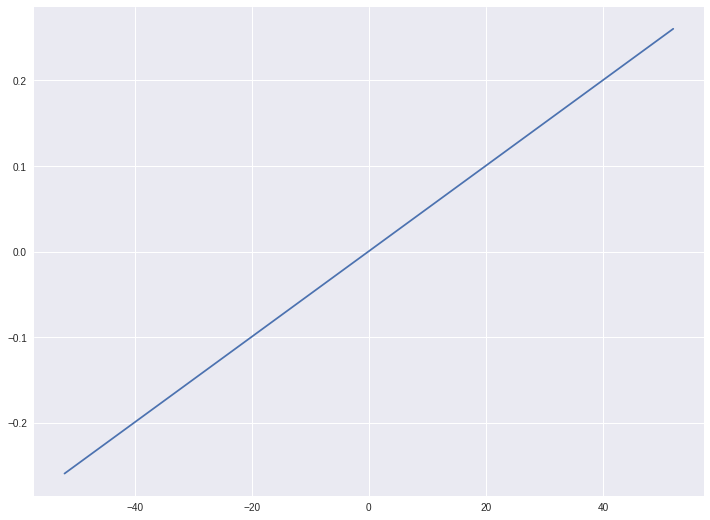

In [212]:
# Plot of approximate conditional expected profit per unit bet against true-count.
# O/S: Scale needs to be appropriately found, for comparison with Thorp (1968)

true_count = np.linspace(-52, 52, 1000)
y = mu_0 + (est_gamma / 52) * true_count
plt.plot(true_count, y)

In [213]:
def bet_staircase(x, thresholds, mu, asymptotic_sd):
  if thresholds[0] < x <= thresholds[1]:
    return mu_0 + (asd * x)
  elif thresholds[1] < x <= thresholds[2]:
    return 1.25 * (mu_0 + (asd * x))
  elif thresholds[2] < x <= thresholds[3]:
    return 1.5 * (mu_0 + (asd * x))
  elif x > thresholds[3]:
    return 2 * (mu_0 + (asd * x))
  else:
    return 0

In [214]:
def plot_bet_staircase(n):
  stdrd_norm_mu = 0
  stdrd_norm_sigma = 1
  N = 52

  zeta = np.linspace(stdrd_norm_mu - (3 * stdrd_norm_sigma),
                stdrd_norm_mu + (3 * stdrd_norm_sigma), 1000)
  
  plt.plot(zeta, stats.norm.pdf(zeta, 0, 1))
  
  asd = asymptotic_sd(est_gamma, n, N, var_J)
  approx_z_n = mu_0 + (asd * zeta)
  approx_z_n_plus = np.maximum(mu_0 + (asd * zeta), 0)
  
  #plt.plot(zeta, approx_z_n, color='b', linestyle='dashed', lw=1.2)
  plt.plot(zeta, approx_z_n_plus, color='b', lw=1.5)

  thresholds = []
  thresholds2 = []

  for beta in [0.000, 0.010, 0.020, 0.030]:
    threshold = compute_threshold_cont_corr(N, n, beta, mu_0, est_gamma, sd_J)
    thresholds.append(threshold)
    plt.vlines(threshold, 0, stats.norm.pdf(threshold, 0, 1), color='k', lw=1.2)
    threshold2 = ((beta - mu_0) / asymptotic_sd(est_gamma, n , N, var_J))
    thresholds2.append(threshold2)
    plt.vlines(threshold2, 0, stats.norm.pdf(threshold2, 0, 1),
              linestyles='dashed', lw=0.7, color='k')
  plt.axhline(0, 0, 1, lw=0.5, color='k')
  plt.axvline(0, 0, 1, lw=0.5, color='k')

  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[0]), color='#1f77b4', alpha=0.2)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[1]), color='#1f77b4', alpha=0.4)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[2]), color='#1f77b4', alpha=0.6)
  plt.fill_between(zeta, 0, stats.norm.pdf(zeta, 0, 1), where=(zeta > thresholds[3]), color='#1f77b4', alpha=0.8)

  plt.xticks(thresholds, (r'$0$', r'$0.01$', r'$0.02$',
                        r'$0.03$'), fontsize=12)  
  plt.xlim(-3, 3)

  plt.title(r'$P({Z}^*_n > \beta)$ ' + 'and ' + r'$\mathbb{E}[{({Z}^*_n)}^+]$'
            + ' when n = {} cards have been seen.'.format(n) + '\n'
            + 'Standard normal PDF ' + r'$\zeta \sim N(0,1)$.'
            , fontsize=15)
  plt.xlabel('$\zeta$ ' + '\n'
             + 'Above axis is labelled with values of advantage threshold, '
             + r'$\beta$' 
             + ' which are used to compute values of the arguments to '
             + r'$\Phi(\zeta)$.'
             , fontsize=14)
  plt.ylabel("Probability density " + r'$\phi(\zeta)$,' + '\n'
             #+ r'${Z}^*_n = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)$' + '\n'#
             r'${({Z}^*_n)}^+ = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)^+$,' + '\n',
             rotation='horizontal', ha='right', fontsize=14)

  plt.legend(['Standard normal PDF $\phi(\zeta)$',
              #r'${Z}^*_n = \mu(\mathbf{0}) + \widehat{\sigma}^2(n)$',#
              r'${({Z}^*_n)}^+ = (\mu(\mathbf{0}) + \widehat{\sigma}^2(n))^+$'], fontsize=14)
  
  approx_z_n_stairs = [bet_staircase(zeta_i, thresholds2, mu_0, asd) for zeta_i in zeta]
  plt.plot(zeta, approx_z_n_stairs)

  approx_z_n_commission = np.maximum(mu_0 + (asd * zeta) - 0.01, 0)
  plt.plot(zeta, approx_z_n_commission)

  return thresholds

[-0.19865619978819116,
 0.5959685993645735,
 1.3905933985173382,
 1.7879057980937203]

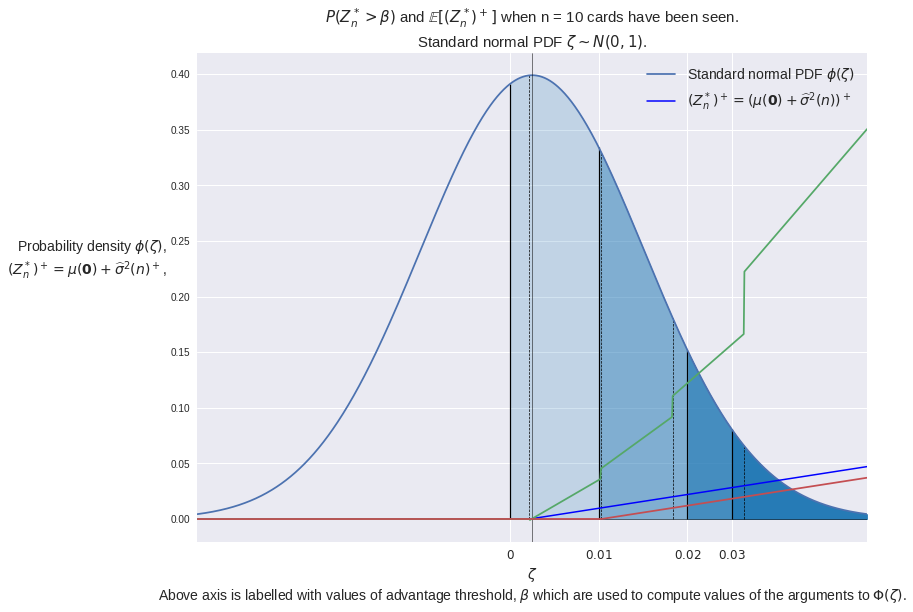

In [215]:
plot_bet_staircase(10)

In [216]:
def bet_staircase(x, thresholds, mu, asymptotic_sd):
  if thresholds[0] < x <= thresholds[1]:
    return mu_0 + (asd * x)
  elif thresholds[1] < x <= thresholds[2]:
    return 1.25 * (mu_0 + (asd * x))
  elif thresholds[2] < x <= thresholds[3]:
    return 1.5 * (mu_0 + (asd * x))
  elif x > thresholds[3]:
    return 2 * (mu_0 + (asd * x))
  else:
    return 0

In [229]:
# Adapting the statitical analysis for 6-deck Blackjack.

E_311 = 311 * EOR
weights2 = np.array(([24/312] * 9) + [96/312])
est_gamma2 = np.dot(weights2 * E_311, HI_LO) / np.sum(weights2 * (HI_LO ** 2))

mu_J2 = np.sum(weights2 * HI_LO)
var_J2 = np.sum(weights2 * (HI_LO ** 2)) - (mu_J2 ** 2)
sd_J2 = np.sqrt(var_J2)

mu_E2 = np.sum(weights * E_311)
var_E2 = np.sum(weights * (E_311 ** 2)) - (mu_E ** 2)
sd_E2 = np.sqrt(var_E2)

correlation2 = np.sum(np.dot(weights * E_311, HI_LO)) / (sd_E2 * sd_J2)

In [278]:
EOR * 100

array([-0.59525 ,  0.38253 ,  0.436234,  0.553671,  0.702373,  0.414736,
        0.284252,  0.00235 , -0.168973, -0.502981])

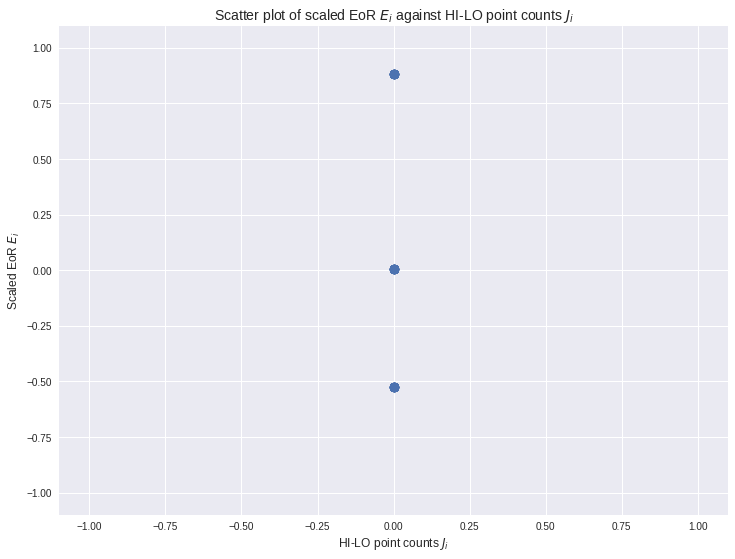

In [228]:
# Need to figure out why this is not working.
# Scatter plot of E_311 againts J_i.

E = []
for i in range(9):
  E = E + ([E_311[i]] * 24)
E_311_no_tens = np.array(E)

J = []
for i in range(9):
  J = J + ([HI_LO[i]] * 24)
J_311_no_tens = np.array(J)

E_311_tens = np.array(E_311[9])
J_311_tens = np.array(HI_LO[9])

E_sample2 = np.hstack((E_311_no_tens, E_311_tens * np.ones(96)))
J_sample2 = np.hstack((J_311_no_tens, J_311_tens * np.ones(96)))

x = np.linspace(-1.5, 1.5, 100)
plt.scatter(J_sample2, E_sample2, s=80,alpha=1)

plt.title('Scatter plot of scaled EoR ' + r'$E_i$' +  ' against HI-LO point counts ' + r'$J_i$', fontsize=14)
plt.xlabel("HI-LO point counts " + r'$J_i$', fontsize=12)
plt.ylabel('Scaled EoR ' + r'$E_i$', fontsize=12)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

plt.show()

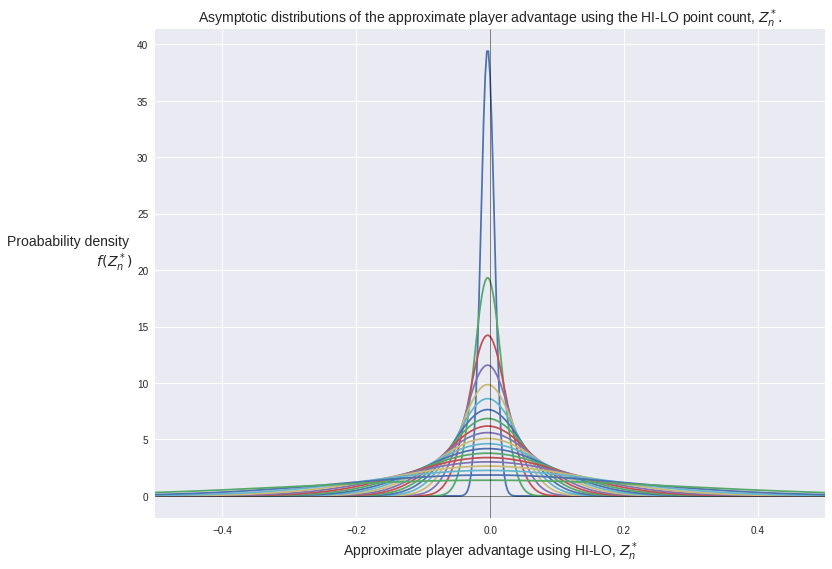

In [240]:
# Plots of the PDF of the approximate conditional expected profit per unit bet
# under the HI-LO system , Z*_n, for the following number of cards seen:
# n = 5, 10, 15, 20, 25, 30, 35, 40.

# Check and tidy this up, available for GitHub viewing.

mu_02 = -0.0037232
N = 312

max_sd2 = asymptotic_sd(est_gamma2, 300, N, var_J2)

x = np.linspace(mu_02 - (3 * max_sd2), mu_02 + (3 * max_sd2), 1000)

for n in range(5, 300, 15):
  sd_n = asymptotic_sd(est_gamma2, n, N, var_J2)

  plt.plot(x, stats.norm.pdf(x, mu_02, sd_n))

plt.xlim(-0.5, 0.5)
plt.axvline(0, 0, 1, color='k', lw=0.5)
plt.axhline(0, 0, 1, color='k', lw=0.5)
plt.title('Asymptotic distributions of the approximate player advantage ' + 
           'using the HI-LO point count, ' + r'${Z}^*_n.$', fontsize=14)
plt.xlabel('Approximate player advantage using HI-LO, ' + 
           r'${Z}^*_n$', fontsize=14)
plt.ylabel('Proabability density \n $f({Z}^*_n)$',
           rotation='horizontal', ha='right', fontsize=14)
plt.show()

In [253]:
def compute_threshold_cont_corr2(N, n, beta, mu, gamma, sd_J):
  threshold = ((np.floor((N - n) * ((beta - mu)/(gamma))) + 0.5)
       * ((1 / sd_J)*(np.sqrt((N-1)/((n)*(N-n))))))
  return threshold

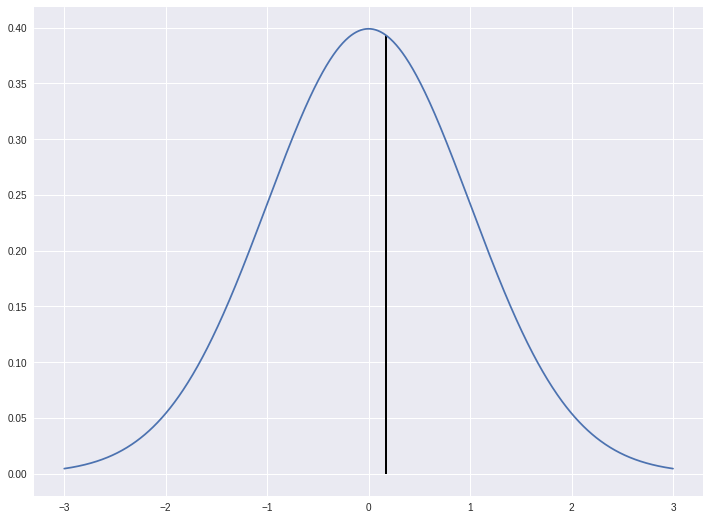

In [264]:
# Show the CDF computations on a standard N(0,1) PDF.

mu_02 = -0.0037232
N = 312

stdrd_norm_mu = 0
stdrd_norm_sigma = 1

z = np.linspace(stdrd_norm_mu - (3 * stdrd_norm_sigma),
                stdrd_norm_mu + (3 * stdrd_norm_sigma), 1000)

for beta in [0.000, 0.010, 0.020, 0.030]:
  threshold = compute_threshold_cont_corr(N, 300, beta, mu_02, est_gamma2, sd_J2)
  plt.vlines(threshold, 0, stats.norm.pdf(threshold, 0, 1), color='k')

plt.plot(z, stats.norm.pdf(z, 0, 1))

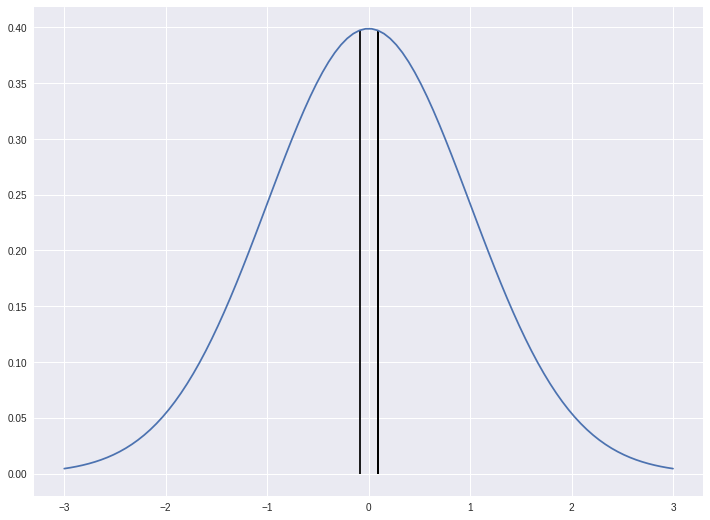

In [255]:
# Show the CDF computations on a standard N(0,1) PDF.

stdrd_norm_mu = 0
stdrd_norm_sigma = 1
N = 52

z = np.linspace(stdrd_norm_mu - (3 * stdrd_norm_sigma),
                stdrd_norm_mu + (3 * stdrd_norm_sigma), 100)

for beta in [0.000, 0.010, 0.020, 0.030]:
  threshold = compute_threshold_cont_corr(N, 50, beta, mu_0, est_gamma, sd_J)
  plt.vlines(threshold, 0, stats.norm.pdf(threshold, 0, 1), color='k')

plt.plot(z, stats.norm.pdf(z, 0, 1))

In [268]:
# Computes probabilities as in Table 21.10 of Ethier (2010).
# Uses the fixed constants as described in the slides.

def complementary_CDF2(n, beta, N, mu, gamma, sigma_J):

  t = (np.floor((N - n) * ((beta - mu)/(gamma))) + 0.5) * ((1 / sigma_J)*(np.sqrt((N-1)/((n)*(N-n)))))

  probability = 1 - stats.norm.cdf(t)
  
  return probability